Exploratory Data Analysis 
(EDA)

### Table of Contents



1. [Introdcution](#1.-introduction)

2. [Importing Library's](#2.-Importing-Library's)

3. [Loading Data](#3.0.-loading-data)

4. [Looking over the data](#4.0.-Looking-Over-the-Data)
    
    A. Checking data types
    
    B.Bringing in missing data values

5. [EDA](#5.0.-EDA)

    A.

6. [Saving the Data](#60-saving-the-data)

7. [Summary](#7.0.-Summary)

In this notebook.I will be doing data cleaning and EDA of the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np
from openpyxl import Workbook

I'll first load the data sets savedout from the data wrangling notebook.


In [3]:
base_dir = os.getcwd()
joined_data = pd.read_csv(base_dir + '/joined_data.csv')


In [4]:
joined_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


 Here I'm comparing those who are below poverty that do and dont have health insurance and seeing what kind of vaccinations they have

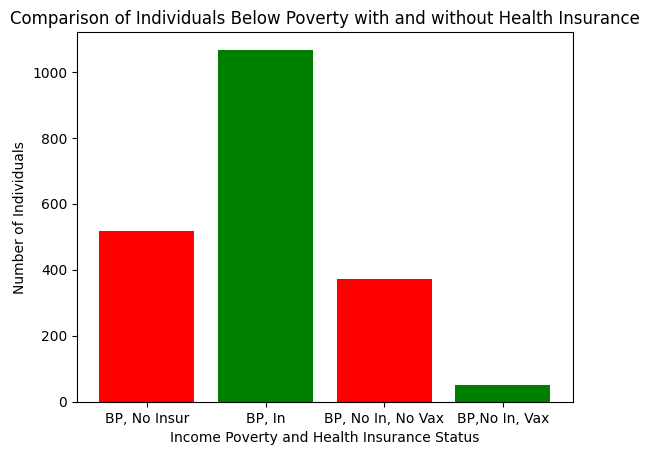

In [5]:
belowPovNoInsur_df = joined_data[(joined_data['income_poverty'] == 'Below Poverty') & (joined_data['health_insurance'] == 0)]
belowPovInsur_df = joined_data[(joined_data['income_poverty'] == 'Below Poverty') & (joined_data['health_insurance'] == 1)]

belowPovNoInsurNoVaccine_df = joined_data[(joined_data['income_poverty'] == 'Below Poverty') & (joined_data['health_insurance'] == 0)& (joined_data['h1n1_vaccine'] == 0)& (joined_data['seasonal_vaccine'] == 0)]
belowPovNoInsurVaccine_df= joined_data[(joined_data['income_poverty'] == 'Below Poverty') & (joined_data['health_insurance'] == 0)& (joined_data['h1n1_vaccine'] == 1) & (joined_data['seasonal_vaccine'] == 1)]

# Count the number of rows in each DataFrame
belowPovNoInsur_count = len(belowPovNoInsur_df)
belowPovInsur_count = len(belowPovInsur_df)
belowPovNoInsurNoVaccine_count = len(belowPovNoInsurNoVaccine_df)
belowPovNoInsurVaccine_count = len(belowPovNoInsurVaccine_df)

# Labels and values for the bar chart
labels = ['BP, No Insur', 'BP, In' , 'BP, No In, No Vax', 'BP,No In, Vax']
values = [belowPovNoInsur_count, belowPovInsur_count, belowPovNoInsurNoVaccine_count, belowPovNoInsurVaccine_count]

# Create a bar chart
plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Income Poverty and Health Insurance Status')
plt.ylabel('Number of Individuals')
plt.title('Comparison of Individuals Below Poverty with and without Health Insurance')
plt.show()

Here Ill looking to see how many people are and arent healthcare workers. I feel like ayone who is will automatically be getting both vaccinations regardless of there other responses.

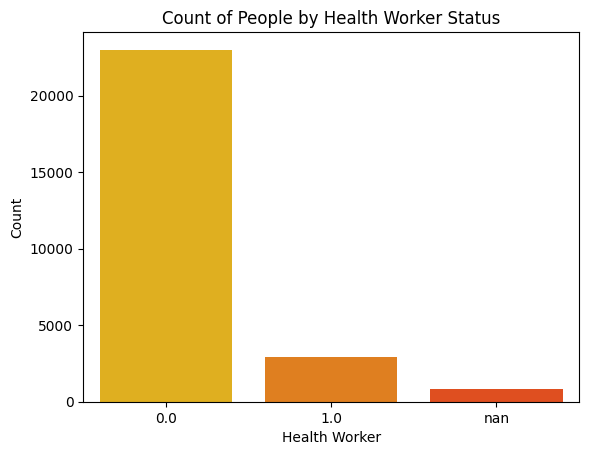

In [6]:
# Create a copy of the original DataFrame
vaccines_df_copy =   joined_data.copy()

# Convert 'health_worker' column to string type in the copied DataFrame
vaccines_df_copy['health_worker'] = vaccines_df_copy['health_worker'].astype(str)

# Replace missing values in the 'health_worker' column with 'Unknown'
vaccines_df_copy['health_worker'].fillna('Unknown', inplace=True)


# Plotting (optional)
sns.countplot(x='health_worker', data=vaccines_df_copy, palette='autumn_r')
plt.xlabel('Health Worker')
plt.ylabel('Count')
plt.title('Count of People by Health Worker Status')
plt.show()

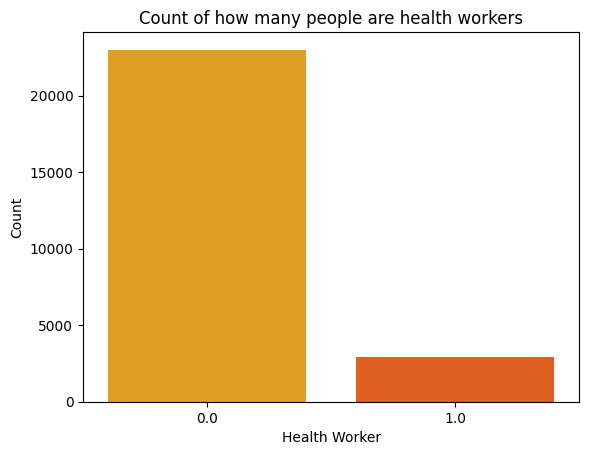

In [7]:
sns.countplot(x='health_worker', data=joined_data, palette='autumn_r')
plt.xlabel('Health Worker')
plt.ylabel('Count')
plt.title('Count of how many people are health workers')
plt.show()

These are all the columns in the dataFrame joined_data with their numerical meaning

h1n1_concern                    0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
h1n1_knowledge                  0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
behavioral_antiviral_meds       Has taken antiviral medications. (binary)
behavioral_avoidance            Has avoided close contact with others with flu-like symptoms. (binary)
behavioral_face_mask            Has bought a face mask. (binary)
behavioral_wash_hands           Has frequently washed hands or used hand sanitizer. (binary)
behavioral_large_gatherings     Has reduced time at large gatherings. (binary)
behavioral_outside_home         Has reduced contact with people outside of own household. (binary)
behavioral_touch_face           Has avoided touching eyes, nose, or mouth. (binary)
doctor_recc_h1n1                H1N1 flu vaccine was recommended by doctor. (binary)
doctor_recc_seasonal            Seasonal flu vaccine was recommended by doctor. (binary)
chronic_med_condition           Has any of the following chronic medical conditions: asthma or an other lung 
                                    condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemiaa neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
child_under_6_months            Has regular close contact with a child under the age of six months. (binary)
health_worker                   Is a healthcare worker. (binary)
health_insurance                Has health insurance. (binary)
opinion_h1n1_vacc_effective     Respondent's opinion about H1N1 vaccine effectiveness.
                                    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_h1n1_risk               Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
                                    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_h1n1_sick_from_vacc     Respondent's worry of getting sick from taking H1N1 vaccine.
                                    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
opinion_seas_vacc_effective     Respondent's opinion about seasonal flu vaccine effectiveness.  
                                    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_seas_risk               Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
                                    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_seas_sick_from_vacc     Respondent's worry of getting sick from taking seasonal flu vaccine.
                                    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
age_group                       Age group of respondent.
education                       Self-reported education level.
race                            Race of respondent.
sex                             Sex of respondent.
income_poverty                  Household annual income of respondent with respect to 2008 Census poverty thresholds.
marital_status                  Marital status of respondent.
rent_or_own                     Housing situation of respondent.
employment_status               Employment status of respondent.
hhs_geo_region                  Respondent's residence using a 10-region geographic classification defined by the U.S. Dept.
                                    of Health and Human Services. Values are represented as short random character strings.
census_msa                      Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S.
                                    Census.
household_adults                Number of other adults in household, top-coded to 3.
household_children              Number of children in household, top-coded to 3.
employment_industry             Type of industry respondent is employed in. Values are represented as short random character 
                                    strings.
employment_occupation           Type of occupation of respondent. Values are represented as short random character strings.
h1n1_vaccine                    Whether respondent received H1N1 flu vaccine.
seasonal_vaccine                Whether respondent received seasonal flu vaccine.

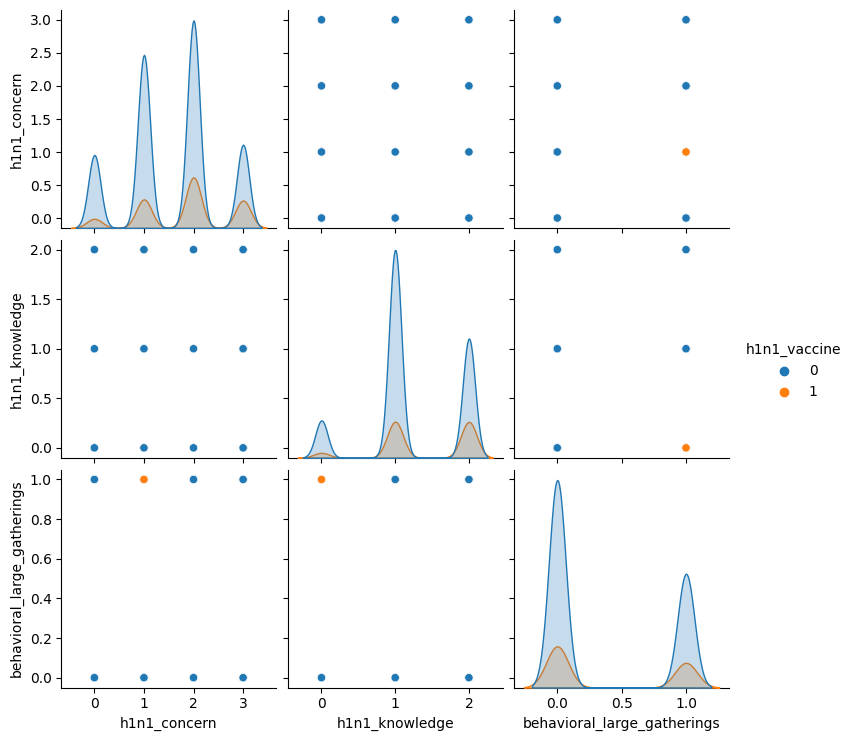

In [8]:
#penguins = sns.load_dataset("penguins")
sns.pairplot(joined_data, vars=['h1n1_concern','h1n1_knowledge', 'behavioral_large_gatherings'],hue='h1n1_vaccine' )

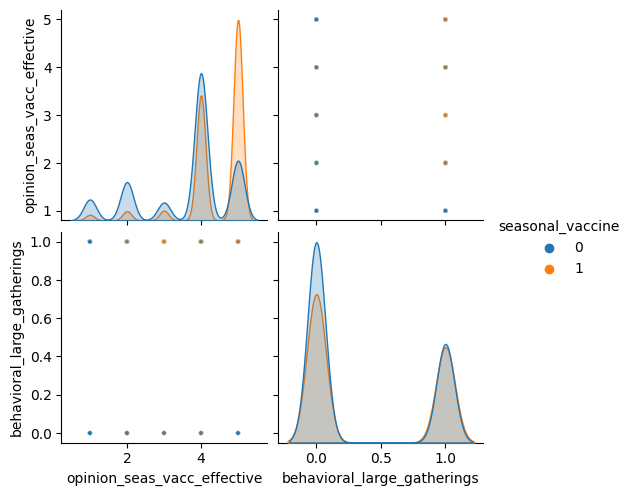

In [9]:
sns.pairplot(joined_data, vars=['opinion_seas_vacc_effective', 'behavioral_large_gatherings'], hue='seasonal_vaccine', plot_kws={'s': 10, 'alpha': 0.5})


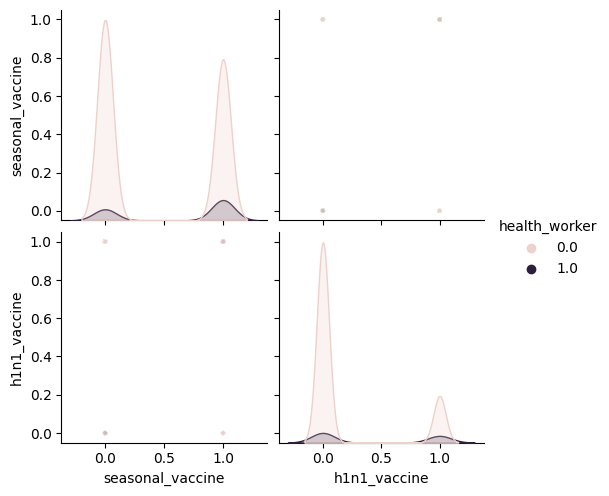

In [10]:
sns.pairplot(joined_data, vars=['seasonal_vaccine', 'h1n1_vaccine'], hue='health_worker', plot_kws={'s': 10, 'alpha': 0.5})
  

In [11]:
joined_data.info(37)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [12]:
column_names = joined_data.columns.tolist()
print(column_names)


['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine']


In [13]:
income_proverty_counts = joined_data.groupby('income_poverty')['respondent_id'].count()
print(income_proverty_counts)


income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: respondent_id, dtype: int64


In [14]:
counts_of_h1n1 = joined_data.groupby('income_poverty')['h1n1_vaccine'].value_counts()
print(counts_of_h1n1)

income_poverty             h1n1_vaccine
<= $75,000, Above Poverty  0               10178
                           1                2599
> $75,000                  0                5087
                           1                1723
Below Poverty              0                2181
                           1                 516
Name: count, dtype: int64


In [15]:
counts_of_seasonal = joined_data.groupby('income_poverty')['seasonal_vaccine'].value_counts()
print(counts_of_seasonal)

income_poverty             seasonal_vaccine
<= $75,000, Above Poverty  0                   6686
                           1                   6091
> $75,000                  0                   3427
                           1                   3383
Below Poverty              0                   1719
                           1                    978
Name: count, dtype: int64


In [16]:
test_GB = joined_data.groupby(['income_poverty','seasonal_vaccine'])['h1n1_vaccine'].value_counts(normalize=True)
print(test_GB)


income_poverty             seasonal_vaccine  h1n1_vaccine
<= $75,000, Above Poverty  0                 0               0.937033
                                             1               0.062967
                           1                 0               0.642423
                                             1               0.357577
> $75,000                  0                 0               0.926758
                                             1               0.073242
                           1                 0               0.564883
                                             1               0.435117
Below Poverty              0                 0               0.919139
                                             1               0.080861
                           1                 0               0.614519
                                             1               0.385481
Name: proportion, dtype: float64


In [17]:
test_GB = joined_data.groupby(['income_poverty','seasonal_vaccine','h1n1_vaccine'])['respondent_id'].value_counts(normalize=True)
print(test_GB)

income_poverty             seasonal_vaccine  h1n1_vaccine  respondent_id
<= $75,000, Above Poverty  0                 0             8798             0.000160
                                                           8822             0.000160
                                                           8799             0.000160
                                                           8806             0.000160
                                                           8808             0.000160
                                                                              ...   
Below Poverty              1                 1             21217            0.002653
                                                           21218            0.002653
                                                           21365            0.002653
                                                           21488            0.002653
                                                           21673            0

In [18]:
by_location = joined_data.groupby(['hhs_geo_region','seasonal_vaccine','h1n1_vaccine'])['respondent_id'].count()
print(by_location)

hhs_geo_region  seasonal_vaccine  h1n1_vaccine
atmpeygn        0                 0                968
                                  1                 63
                1                 0                623
                                  1                379
bhuqouqj        0                 0               1313
                                  1                120
                1                 0                797
                                  1                616
dqpwygqj        0                 0                602
                                  1                 35
                1                 0                331
                                  1                158
fpwskwrf        0                 0               1592
                                  1                125
                1                 0               1015
                                  1                533
kbazzjca        0                 0               1394
                  

In [19]:
by_doc = joined_data.groupby(['doctor_recc_seasonal','doctor_recc_h1n1','seasonal_vaccine','h1n1_vaccine'])['respondent_id'].count()
print(by_doc)

doctor_recc_seasonal  doctor_recc_h1n1  seasonal_vaccine  h1n1_vaccine
0.0                   0.0               0                 0               9762
                                                          1                481
                                        1                 0               3611
                                                          1               1805
                      1.0               0                 0                275
                                                          1                238
                                        1                 0                135
                                                          1                146
1.0                   0.0               0                 0                770
                                                          1                 33
                                        1                 0               2386
                                                          1 

In [20]:
# Group by 'income_poverty' and 'seasonal_vaccine' columns and count the number of respondents
grouped_data1 = joined_data.groupby(['income_poverty', 'seasonal_vaccine']).size()
print(grouped_data1)

# Group by 'age_group' and 'h1n1_vaccine' columns and calculate the mean of 'h1n1_concern'
grouped_data2 = joined_data.groupby(['age_group', 'h1n1_vaccine'])['h1n1_concern'].mean()
print(grouped_data2)


income_poverty             seasonal_vaccine
<= $75,000, Above Poverty  0                   6686
                           1                   6091
> $75,000                  0                   3427
                           1                   3383
Below Poverty              0                   1719
                           1                    978
dtype: int64
age_group      h1n1_vaccine
18 - 34 Years  0               1.423359
               1               1.589899
35 - 44 Years  0               1.612914
               1               1.889474
45 - 54 Years  0               1.605032
               1               1.911591
55 - 64 Years  0               1.588277
               1               1.900667
65+ Years      0               1.583333
               1               1.846853
Name: h1n1_concern, dtype: float64


In [21]:

# Group by 'education' and 'health_insurance' columns and calculate the sum of 'behavioral_avoidance'
grouped_data3 = joined_data.groupby(['education', 'health_insurance','seasonal_vaccine','h1n1_vaccine'])['behavioral_avoidance'].sum()
print(grouped_data3)


education         health_insurance  seasonal_vaccine  h1n1_vaccine
12 Years          0.0               0                 0                288.0
                                                      1                 20.0
                                    1                 0                 55.0
                                                      1                 32.0
                  1.0               0                 0                800.0
                                                      1                 82.0
                                    1                 0                606.0
                                                      1                507.0
< 12 Years        0.0               0                 0                160.0
                                                      1                 17.0
                                    1                 0                 26.0
                                                      1                 24.0
         

In [22]:
# Group by 'age_group', 'education', 'income_poverty', 'health_insurance', 'hhs_geo_region', 'doctor_recc_seasonal', 'doctor_recc_h1n1', 'behavioral_avoidance', 'behavioral_large_gatherings', 'seasonal_vaccine', 'h1n1_vaccine'
grouped_data1 = joined_data.groupby(['age_group', 'education', 'income_poverty', 'health_insurance', 'hhs_geo_region', 'doctor_recc_seasonal', 'doctor_recc_h1n1', 'behavioral_avoidance', 'behavioral_large_gatherings', 'seasonal_vaccine', 'h1n1_vaccine']).size()

# Group by 'race', 'sex', 'marital_status', 'employment_status', 'census_msa', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'seasonal_vaccine', 'h1n1_vaccine'
grouped_data2 = joined_data.groupby(['race', 'sex', 'marital_status', 'employment_status', 'census_msa', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'seasonal_vaccine', 'h1n1_vaccine']).size()

# Group by 'age_group', 'education', 'income_poverty', 'health_insurance', 'hhs_geo_region', 'doctor_recc_seasonal', 'doctor_recc_h1n1', 'behavioral_avoidance', 'behavioral_large_gatherings', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'seasonal_vaccine', 'h1n1_vaccine'
grouped_data3 = joined_data.groupby(['age_group', 'education', 'income_poverty', 'health_insurance', 'hhs_geo_region', 'doctor_recc_seasonal', 'doctor_recc_h1n1', 'behavioral_avoidance', 'behavioral_large_gatherings', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'seasonal_vaccine', 'h1n1_vaccine']).size()

# Group by 'race', 'sex', 'marital_status', 'employment_status', 'census_msa', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'seasonal_vaccine', 'h1n1_vaccine'
grouped_data4 = joined_data.groupby(['race', 'sex', 'marital_status', 'employment_status', 'census_msa', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'seasonal_vaccine', 'h1n1_vaccine']).size()

# Print the grouped data
print(grouped_data1)
print(grouped_data2)
print(grouped_data3)
print(grouped_data4)



age_group      education     income_poverty             health_insurance  hhs_geo_region  doctor_recc_seasonal  doctor_recc_h1n1  behavioral_avoidance  behavioral_large_gatherings  seasonal_vaccine  h1n1_vaccine
18 - 34 Years  12 Years      <= $75,000, Above Poverty  0.0               atmpeygn        0.0                   0.0               0.0                   0.0                          0                 0               4
                                                                                                                                                        1.0                          0                 0               2
                                                                                                                                  1.0                   0.0                          0                 0               1
                                                                                                                                         

In [34]:
# Group by 'seasonal_vaccine' and 'h1n1_vaccine', and calculate the mean of 'age_group'
grouped_data1 = joined_data.groupby(['seasonal_vaccine', 'h1n1_vaccine'])['age_group'].mean()

# Group by 'seasonal_vaccine' and 'h1n1_vaccine', and calculate the sum of 'behavioral_avoidance'
grouped_data2 = joined_data.groupby(['seasonal_vaccine', 'h1n1_vaccine'])['behavioral_avoidance'].sum()

# Group by 'seasonal_vaccine' and 'h1n1_vaccine', and count the number of respondents
grouped_data3 = joined_data.groupby(['seasonal_vaccine', 'h1n1_vaccine']).size()

# Group by 'seasonal_vaccine' and 'h1n1_vaccine', and calculate the mean of 'opinion_h1n1_risk'
grouped_data4 = joined_data.groupby(['seasonal_vaccine', 'h1n1_vaccine'])['opinion_h1n1_risk'].mean()

# Print the grouped data
print(grouped_data1)
print(grouped_data2)
print(grouped_data3)
print(grouped_data4)


TypeError: Could not convert 55 - 64 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years65+ Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years65+ Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years65+ Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years65+ Years65+ Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years65+ Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years65+ Years35 - 44 Years65+ Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years65+ Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years65+ Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years65+ Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years65+ Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years65+ Years65+ Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years65+ Years55 - 64 Years65+ Years65+ Years35 - 44 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years65+ Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years65+ Years65+ Years65+ Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years65+ Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years65+ Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years65+ Years65+ Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years65+ Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years65+ Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years65+ Years18 - 34 Years18 - 34 Years65+ Years65+ Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years65+ Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years65+ Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years65+ Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years65+ Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years65+ Years65+ Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years65+ Years65+ Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years65+ Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years65+ Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years65+ Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years65+ Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years65+ Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years65+ Years65+ Years65+ Years65+ Years65+ Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years65+ Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years65+ Years45 - 54 Years65+ Years65+ Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years65+ Years65+ Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years65+ Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years65+ Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years65+ Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years65+ Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years65+ Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years65+ Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years65+ Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years65+ Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years65+ Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years65+ Years65+ Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years65+ Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years65+ Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years65+ Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years65+ Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years65+ Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years65+ Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years65+ Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years65+ Years65+ Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years65+ Years18 - 34 Years65+ Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years65+ Years65+ Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years65+ Years65+ Years35 - 44 Years65+ Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years65+ Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years65+ Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years65+ Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years65+ Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years65+ Years65+ Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years65+ Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years65+ Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years65+ Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years65+ Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years65+ Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years65+ Years55 - 64 Years65+ Years65+ Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years65+ Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years65+ Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years65+ Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years65+ Years35 - 44 Years65+ Years18 - 34 Years65+ Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years65+ Years65+ Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years65+ Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years65+ Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years65+ Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years65+ Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years65+ Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years65+ Years65+ Years65+ Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years65+ Years65+ Years55 - 64 Years65+ Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years65+ Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years65+ Years65+ Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years65+ Years35 - 44 Years35 - 44 Years65+ Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years65+ Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years65+ Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years65+ Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years65+ Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years65+ Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years65+ Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years65+ Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years65+ Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years65+ Years55 - 64 Years65+ Years35 - 44 Years65+ Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years65+ Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years65+ Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years65+ Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years65+ Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years65+ Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years65+ Years65+ Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years65+ Years65+ Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years65+ Years65+ Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years65+ Years65+ Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years65+ Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years65+ Years65+ Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years65+ Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years65+ Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years65+ Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years65+ Years65+ Years55 - 64 Years18 - 34 Years65+ Years65+ Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years65+ Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years65+ Years45 - 54 Years65+ Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years65+ Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years65+ Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years65+ Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years65+ Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years65+ Years65+ Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years65+ Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years65+ Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years65+ Years65+ Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years65+ Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years65+ Years65+ Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years65+ Years65+ Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years65+ Years55 - 64 Years65+ Years65+ Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years65+ Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years65+ Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years65+ Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years65+ Years65+ Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years65+ Years65+ Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years35 - 44 Years65+ Years65+ Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years65+ Years35 - 44 Years65+ Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years65+ Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years65+ Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years65+ Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years65+ Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years65+ Years65+ Years55 - 64 Years18 - 34 Years65+ Years65+ Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years65+ Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years65+ Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years65+ Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years65+ Years65+ Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years65+ Years65+ Years35 - 44 Years45 - 54 Years65+ Years65+ Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years65+ Years65+ Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years65+ Years65+ Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years65+ Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years65+ Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years65+ Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years65+ Years65+ Years45 - 54 Years35 - 44 Years65+ Years65+ Years65+ Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years65+ Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years65+ Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years65+ Years45 - 54 Years65+ Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years65+ Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years65+ Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years65+ Years65+ Years65+ Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years65+ Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years65+ Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years65+ Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years65+ Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years45 - 54 Years65+ Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years65+ Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years65+ Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years65+ Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years65+ Years18 - 34 Years65+ Years65+ Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years65+ Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years65+ Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years65+ Years65+ Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years65+ Years35 - 44 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years65+ Years65+ Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years65+ Years18 - 34 Years65+ Years35 - 44 Years65+ Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years65+ Years65+ Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years65+ Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years65+ Years45 - 54 Years65+ Years35 - 44 Years65+ Years65+ Years18 - 34 Years65+ Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years65+ Years65+ Years35 - 44 Years65+ Years65+ Years35 - 44 Years65+ Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years65+ Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years35 - 44 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years65+ Years65+ Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years55 - 64 Years65+ Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years55 - 64 Years55 - 64 Years65+ Years18 - 34 Years35 - 44 Years45 - 54 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years65+ Years45 - 54 Years18 - 34 Years45 - 54 Years18 - 34 Years65+ Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years18 - 34 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years18 - 34 Years35 - 44 Years55 - 64 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years45 - 54 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years65+ Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years35 - 44 Years65+ Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years35 - 44 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years18 - 34 Years55 - 64 Years65+ Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years35 - 44 Years65+ Years65+ Years18 - 34 Years55 - 64 Years18 - 34 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years55 - 64 Years45 - 54 Years55 - 64 Years35 - 44 Years35 - 44 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years18 - 34 Years18 - 34 Years18 - 34 Years45 - 54 Years55 - 64 Years45 - 54 Years55 - 64 Years45 - 54 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years65+ Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years18 - 34 Years55 - 64 Years45 - 54 Years35 - 44 Years35 - 44 Years35 - 44 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years45 - 54 Years65+ Years35 - 44 Years45 - 54 Years65+ Years55 - 64 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years55 - 64 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years35 - 44 Years35 - 44 Years65+ Years35 - 44 Years65+ Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years55 - 64 Years35 - 44 Years18 - 34 Years35 - 44 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years55 - 64 Years45 - 54 Years55 - 64 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years65+ Years18 - 34 Years55 - 64 Years35 - 44 Years18 - 34 Years55 - 64 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years55 - 64 Years45 - 54 Years65+ Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years65+ Years18 - 34 Years18 - 34 Years65+ Years65+ Years18 - 34 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years45 - 54 Years18 - 34 Years45 - 54 Years35 - 44 Years65+ Years35 - 44 Years18 - 34 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years18 - 34 Years45 - 54 Years18 - 34 Years55 - 64 Years45 - 54 Years18 - 34 Years18 - 34 Years18 - 34 Years35 - 44 Years18 - 34 Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years35 - 44 Years18 - 34 Years35 - 44 Years18 - 34 Years35 - 44 Years45 - 54 Years55 - 64 Years35 - 44 Years45 - 54 Years45 - 54 Years45 - 54 Years18 - 34 Years35 - 44 Years45 - 54 Years18 - 34 Years55 - 64 Years55 - 64 Years35 - 44 Years65+ Years65+ Years45 - 54 Years45 - 54 Years55 - 64 Years65+ Years18 - 34 Years45 - 54 Years35 - 44 Years55 - 64 Years35 - 44 Years18 - 34 Years65+ Years65+ Years45 - 54 Years65+ Years55 - 64 Years55 - 64 Years65+ Years55 - 64 Years18 - 34 Years55 - 64 Years18 - 34 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years65+ Years45 - 54 Years45 - 54 Years35 - 44 Years55 - 64 Years65+ Years45 - 54 Years45 - 54 Years65+ Years18 - 34 Years45 - 54 Years18 - 34 Years18 - 34 Years35 - 44 Years35 - 44 Years35 - 44 Years45 - 54 Years18 - 34 Years35 - 44 Years55 - 64 Years18 - 34 Years18 - 34 Years45 - 54 Years65+ Years45 - 54 Years55 - 64 Years18 - 34 Years18 - 34 Years65+ Years45 - 54 Years18 - 34 Years65+ Years18 - 34 Years18 - 34 Years65+ Years to numeric

In [26]:
joined_data['age_group'].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [27]:
joined_data['sex'].value_counts()

sex
Female    15858
Male      10849
Name: count, dtype: int64

In [35]:
joined_data.groupby('h1n1_vaccine','seasonal_vaccine')['sex'].value_counts()

ValueError: No axis named seasonal_vaccine for object type DataFrame